In [1]:
import pandas as pd
import string
import re

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
messy_df = pd.read_pickle('../data/messy_df.pkl')

In [3]:
messy_df.head()

,created_utc,num_comments,subreddit,subreddit_subscribers,text,title,upvote_ratio,url,image?
0,1.502177e+09,840.0,TheRedPill,0.0,"As reported in Bloomberg, Google has fired a s...",Google Fires Ph.D Biologist/Engineer For Claim...,0.65,https://www.reddit.com/r/TheRedPill/comments/6...,False
1,1.480424e+09,759.0,TheRedPill,0.0,**A complete guide to picking up 9s and 10s** ...,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,0.82,https://www.reddit.com/r/TheRedPill/comments/5...,False
2,1.502101e+09,179.0,TheRedPill,0.0,**Practical Stoicism Tools**\n\nStoicism philo...,I have been practicing Stoicism for 3 years no...,0.86,https://www.reddit.com/r/TheRedPill/comments/6...,False
3,1.433962e+09,954.0,TheRedPill,0.0,The most notorious target was FatPeopleHate. Y...,"[META] Reddit rolls out first ban wave of ""Har...",0.87,https://www.reddit.com/r/TheRedPill/comments/3...,False
4,1.500270e+09,336.0,TheRedPill,0.0,Kind of surprised this hasn't made its way her...,"Man gets his ex-GF to pay child support, and R...",0.90,https://www.reddit.com/r/TheRedPill/comments/6...,False


In [4]:
# TODO: this is where the image processing for text will go

In [5]:
messy_df['total_text'] = messy_df['title'] + messy_df['text']

In [6]:
messy_df.drop(columns= ['title', 'text'])

,created_utc,num_comments,subreddit,subreddit_subscribers,upvote_ratio,url,image?,total_text
0,1.502177e+09,840.0,TheRedPill,0.0,0.65,https://www.reddit.com/r/TheRedPill/comments/6...,False,Google Fires Ph.D Biologist/Engineer For Claim...
1,1.480424e+09,759.0,TheRedPill,0.0,0.82,https://www.reddit.com/r/TheRedPill/comments/5...,False,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...
2,1.502101e+09,179.0,TheRedPill,0.0,0.86,https://www.reddit.com/r/TheRedPill/comments/6...,False,I have been practicing Stoicism for 3 years no...
3,1.433962e+09,954.0,TheRedPill,0.0,0.87,https://www.reddit.com/r/TheRedPill/comments/3...,False,"[META] Reddit rolls out first ban wave of ""Har..."
4,1.500270e+09,336.0,TheRedPill,0.0,0.90,https://www.reddit.com/r/TheRedPill/comments/6...,False,"Man gets his ex-GF to pay child support, and R..."
...,...,...,...,...,...,...,...,...
11004,1.633457e+09,900.0,Anarcho_Capitalism,186148.0,0.88,https://v.redd.it/0ptsjdwh9or71,False,"The is Los Angeles, California"
11005,1.632157e+09,2229.0,Anarcho_Capitalism,186148.0,0.83,https://i.redd.it/xmgcuoawtoo71.png,True,Personal freedoms
11006,1.591131e+09,141.0,Anarcho_Capitalism,186148.0,0.93,https://i.imgur.com/ticpuuy.jpg,True,Progressive Liberal
11007,1.638208e+09,506.0,Anarcho_Capitalism,186148.0,0.89,https://i.redd.it/dcyjbpirmk281.jpg,True,Welp…


In [7]:
messy_df['total_text'].dropna()

0        Google Fires Ph.D Biologist/Engineer For Claim...
1        HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...
2        I have been practicing Stoicism for 3 years no...
3        [META] Reddit rolls out first ban wave of "Har...
4        Man gets his ex-GF to pay child support, and R...
                               ...                        
11004                       The is Los Angeles, California
11005                                    Personal freedoms
11006                                  Progressive Liberal
11007                                                Welp…
11008                                  You guys were right
Name: total_text, Length: 11009, dtype: object

In [8]:
messy_df['total_text']

0        Google Fires Ph.D Biologist/Engineer For Claim...
1        HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...
2        I have been practicing Stoicism for 3 years no...
3        [META] Reddit rolls out first ban wave of "Har...
4        Man gets his ex-GF to pay child support, and R...
                               ...                        
11004                       The is Los Angeles, California
11005                                    Personal freedoms
11006                                  Progressive Liberal
11007                                                Welp…
11008                                  You guys were right
Name: total_text, Length: 11009, dtype: object

In [9]:
stopwords_ = stopwords.words('English')
stopwords_ += list(string.punctuation)
stopwords_ += ['r', 'www', 'https', 'http', 'reddit', 'com', 'post', 'sub', 'account', 'imgur'] #commonly used reddit link words
stopwords_ += ['like', 'one', 'get', 'would', 'much', 'also', 'really', 'even', 'gt', 'got', 'us', 'never', 'go', 'see', 'way', 'could', 'back', 'need', 'take', 
                'year'] #common words in the dataset

In [10]:
lemmatizer = WordNetLemmatizer()

In [11]:
def stop_and_lemmatize(string):
    """
    Helper function for eda on the total corpus
    """
    current = re.split(r'[^a-zA-Z]', string)
    total = [x.lower() for x in current if x.lower() not in stopwords_]

    final = [lemmatizer.lemmatize(x) for x in total]

    return final

In [12]:
messy_df['tokenned_stopped_text'] = messy_df['total_text'].apply(stop_and_lemmatize)

In [13]:
corpus_series = messy_df['tokenned_stopped_text']

In [14]:
corpus_series

0        [google, fire, ph, biologist, engineer, claimi...
1        [laid, warlord, , , , , rule, approaching, mod...
2        [practicing, stoicism, , , year, quality, life...
3        [, meta, , roll, first, ban, wave, , harassing...
4        [man, get, ex, gf, pay, child, support, , frea...
                               ...                        
11004                         [los, angeles, , california]
11005                                  [personal, freedom]
11006                               [progressive, liberal]
11007                                             [welp, ]
11008                                         [guy, right]
Name: tokenned_stopped_text, Length: 11009, dtype: object

In [15]:
new_corpus_series = []

for word_list in corpus_series:
    new_corpus_series.extend(word_list)

In [16]:
new_corpus_series = pd.Series(new_corpus_series)

In [17]:
new_corpus_series = new_corpus_series[new_corpus_series != '']

In [18]:
len(new_corpus_series)

269944

In [19]:
freqdist = FreqDist(new_corpus_series)
most_common = freqdist.most_common(500)
most_common

[('woman', 2550),
 ('trump', 1798),
 ('people', 1508),
 ('men', 1452),
 ('time', 1273),
 ('want', 1012),
 ('make', 963),
 ('amp', 952),
 ('girl', 915),
 ('say', 862),
 ('guy', 856),
 ('know', 849),
 ('thing', 804),
 ('day', 790),
 ('biden', 787),
 ('life', 786),
 ('comment', 782),
 ('think', 757),
 ('man', 722),
 ('right', 699),
 ('first', 649),
 ('good', 642),
 ('news', 627),
 ('president', 620),
 ('going', 610),
 ('donald', 608),
 ('work', 561),
 ('sex', 553),
 ('look', 542),
 ('new', 528),
 ('feel', 527),
 ('twitter', 523),
 ('feminist', 522),
 ('year', 497),
 ('many', 496),
 ('made', 477),
 ('every', 471),
 ('feminism', 470),
 ('something', 464),
 ('world', 454),
 ('friend', 452),
 ('male', 450),
 ('well', 449),
 ('still', 440),
 ('let', 437),
 ('lot', 436),
 ('house', 436),
 ('said', 431),
 ('call', 429),
 ('b', 427),
 ('state', 417),
 ('someone', 413),
 ('fuck', 412),
 ('sexual', 396),
 ('shit', 387),
 ('getting', 380),
 ('edit', 380),
 ('use', 376),
 ('love', 376),
 ('article', 

In [20]:
top_30 = most_common[0:30]

In [21]:
x = []
y = []

for tuple in top_30:
    x.append(tuple[0])
    y.append(tuple[1])

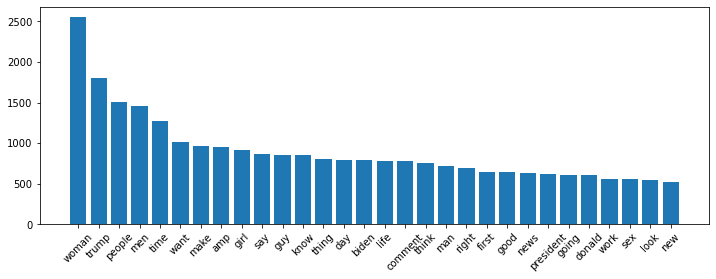

In [22]:
fig, ax = plt.subplots()

fig.set_figwidth(12)

ax.bar(x,y)
plt.xticks(rotation = 45)
plt.show()

In [23]:
tfidf_vectorizer = TfidfVectorizer(stop_words = stopwords_)

text_transformed = tfidf_vectorizer.fit_transform(messy_df['total_text'])